# Softmax

Such that the sum is 1

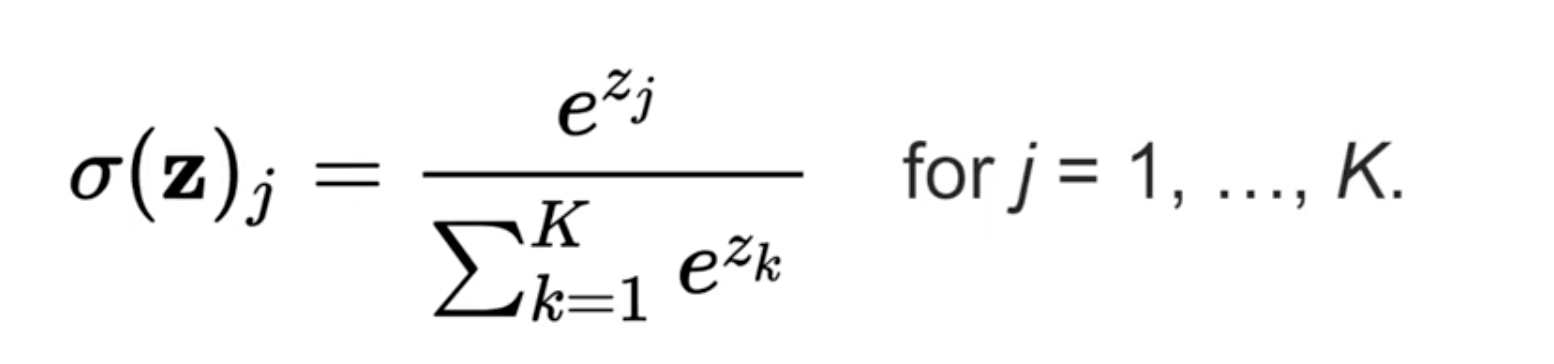


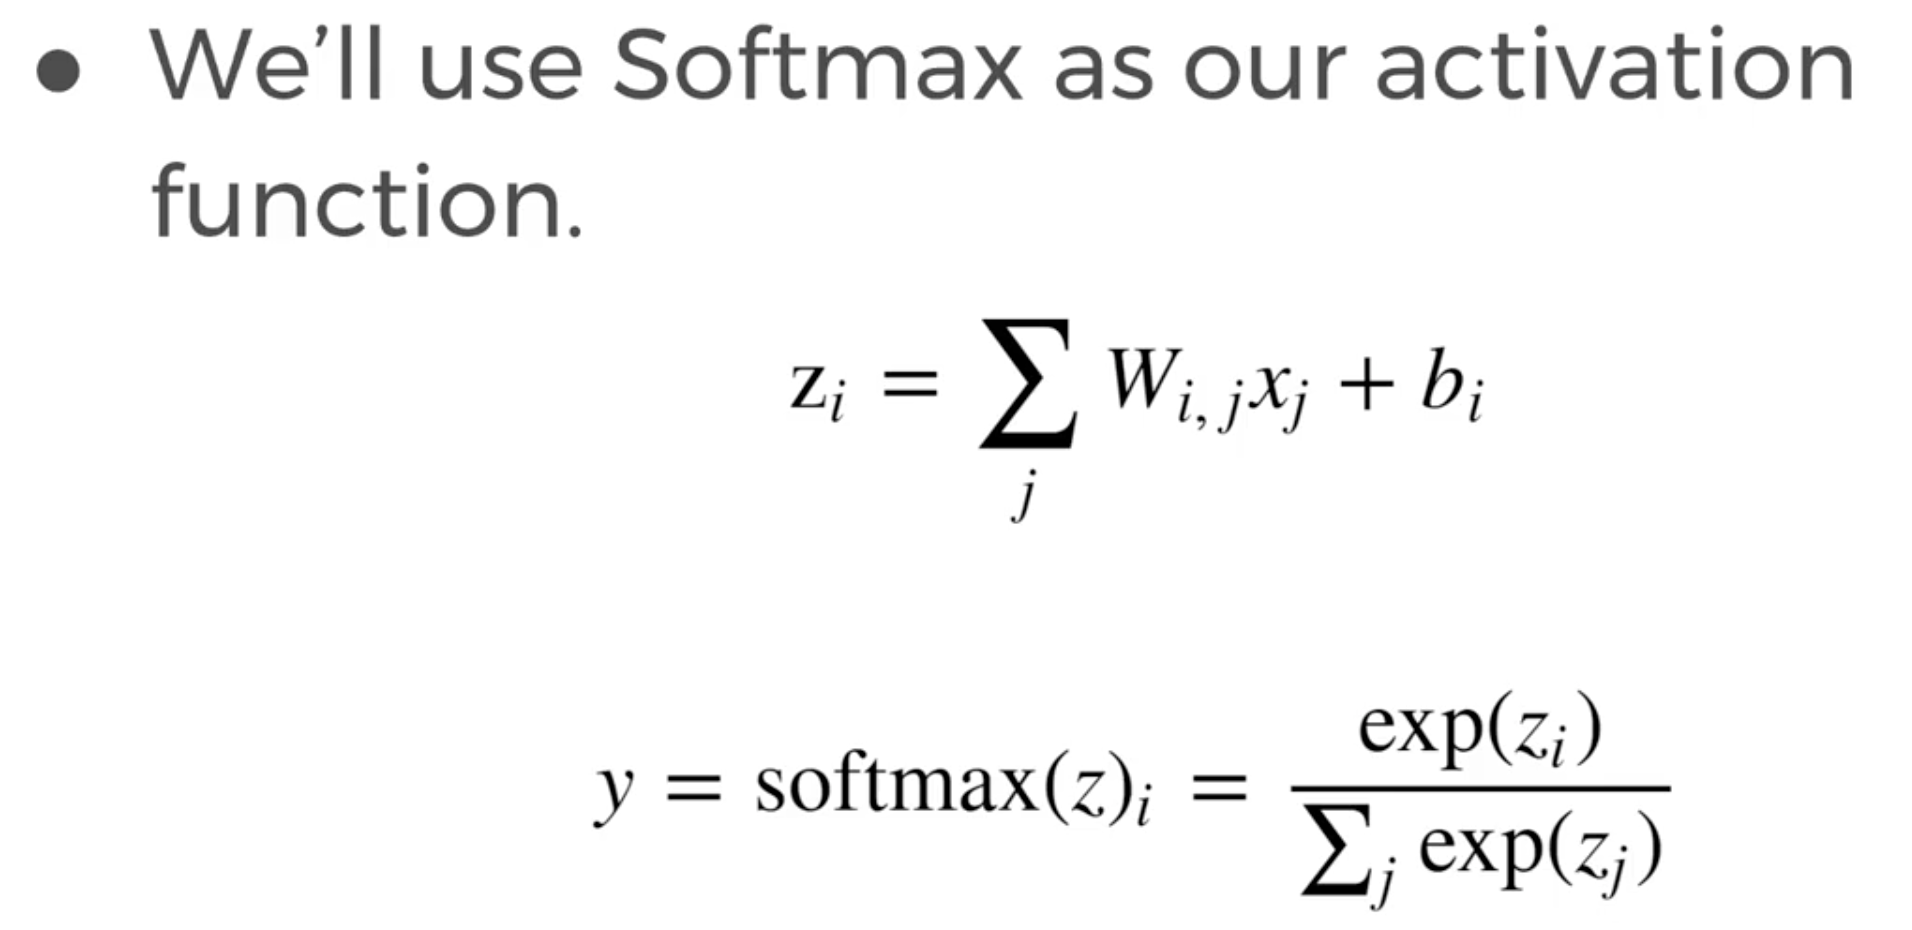

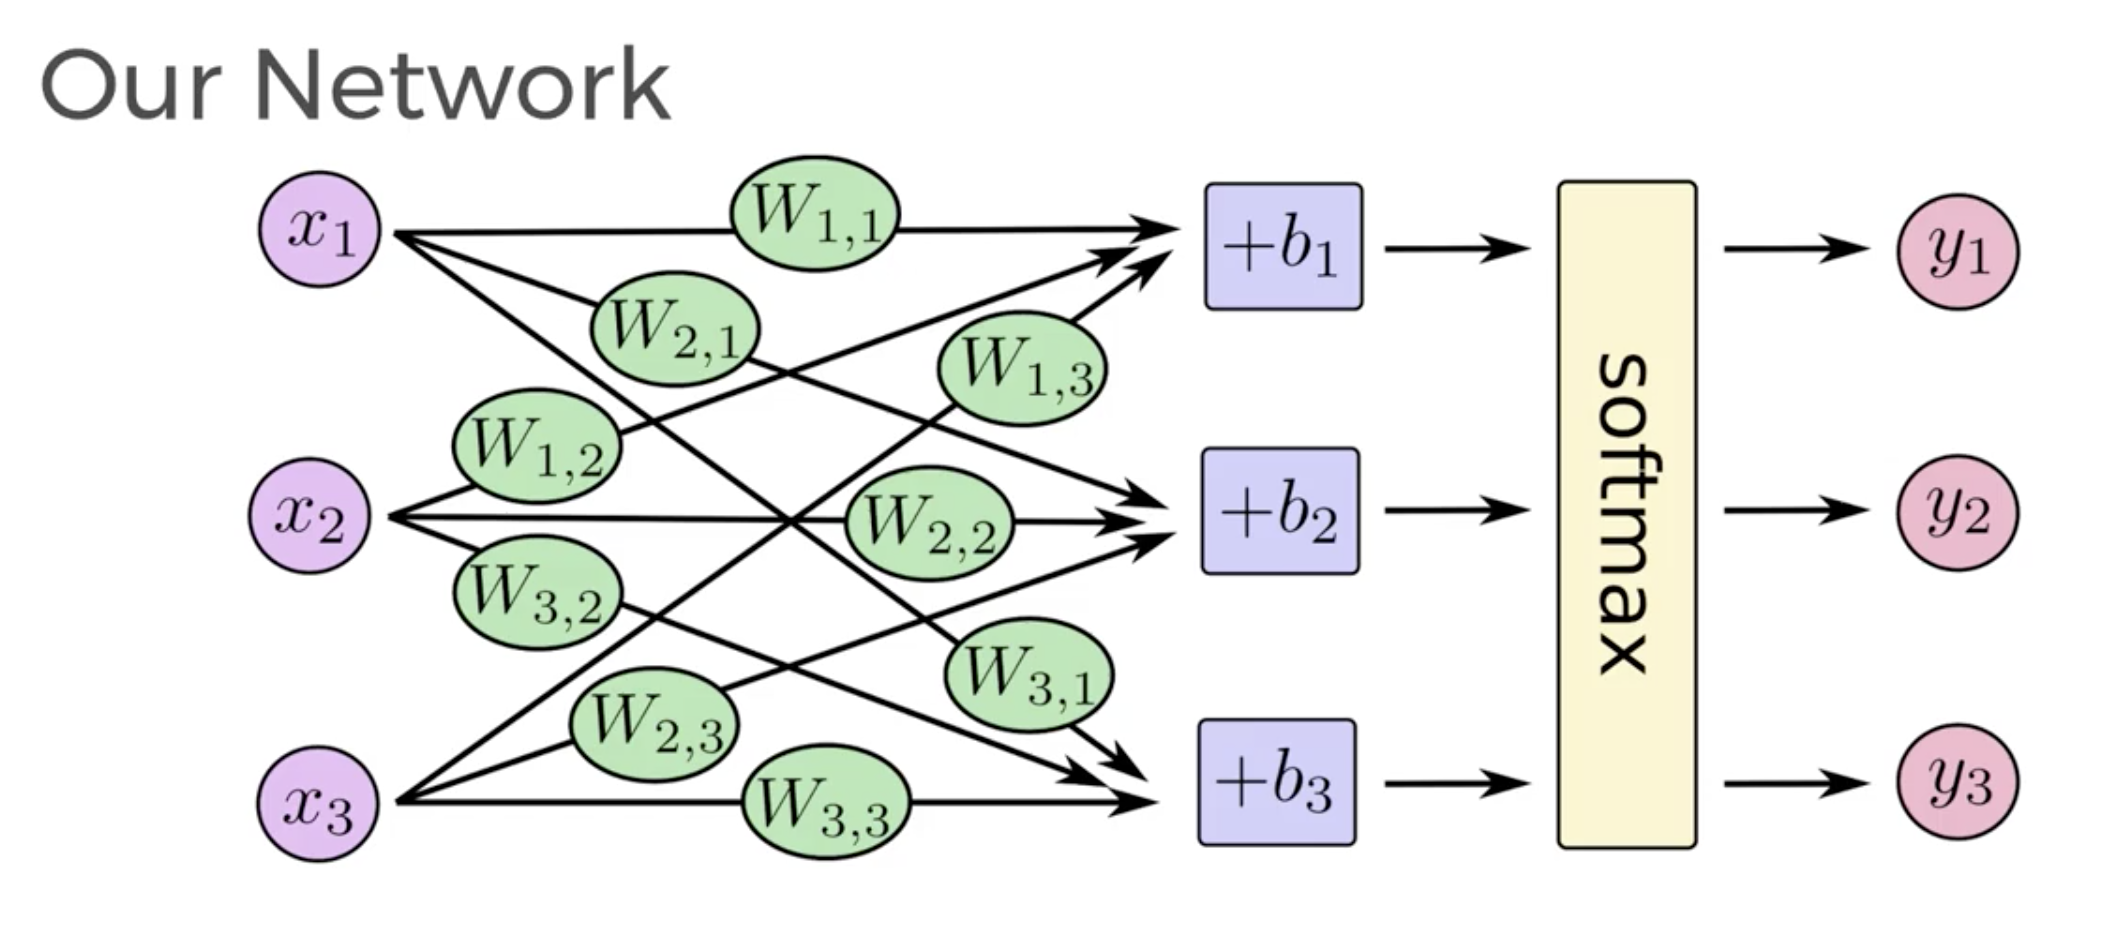

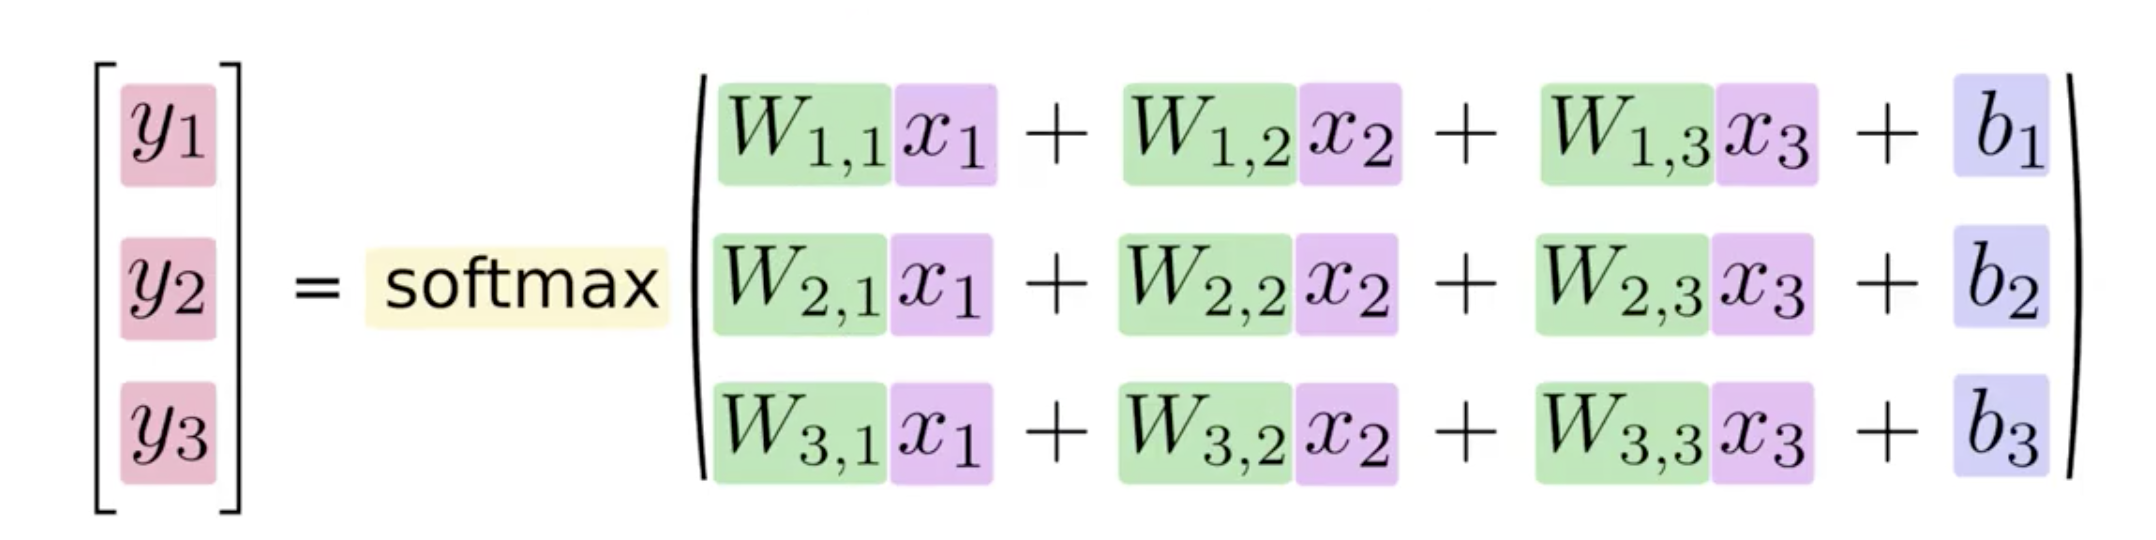

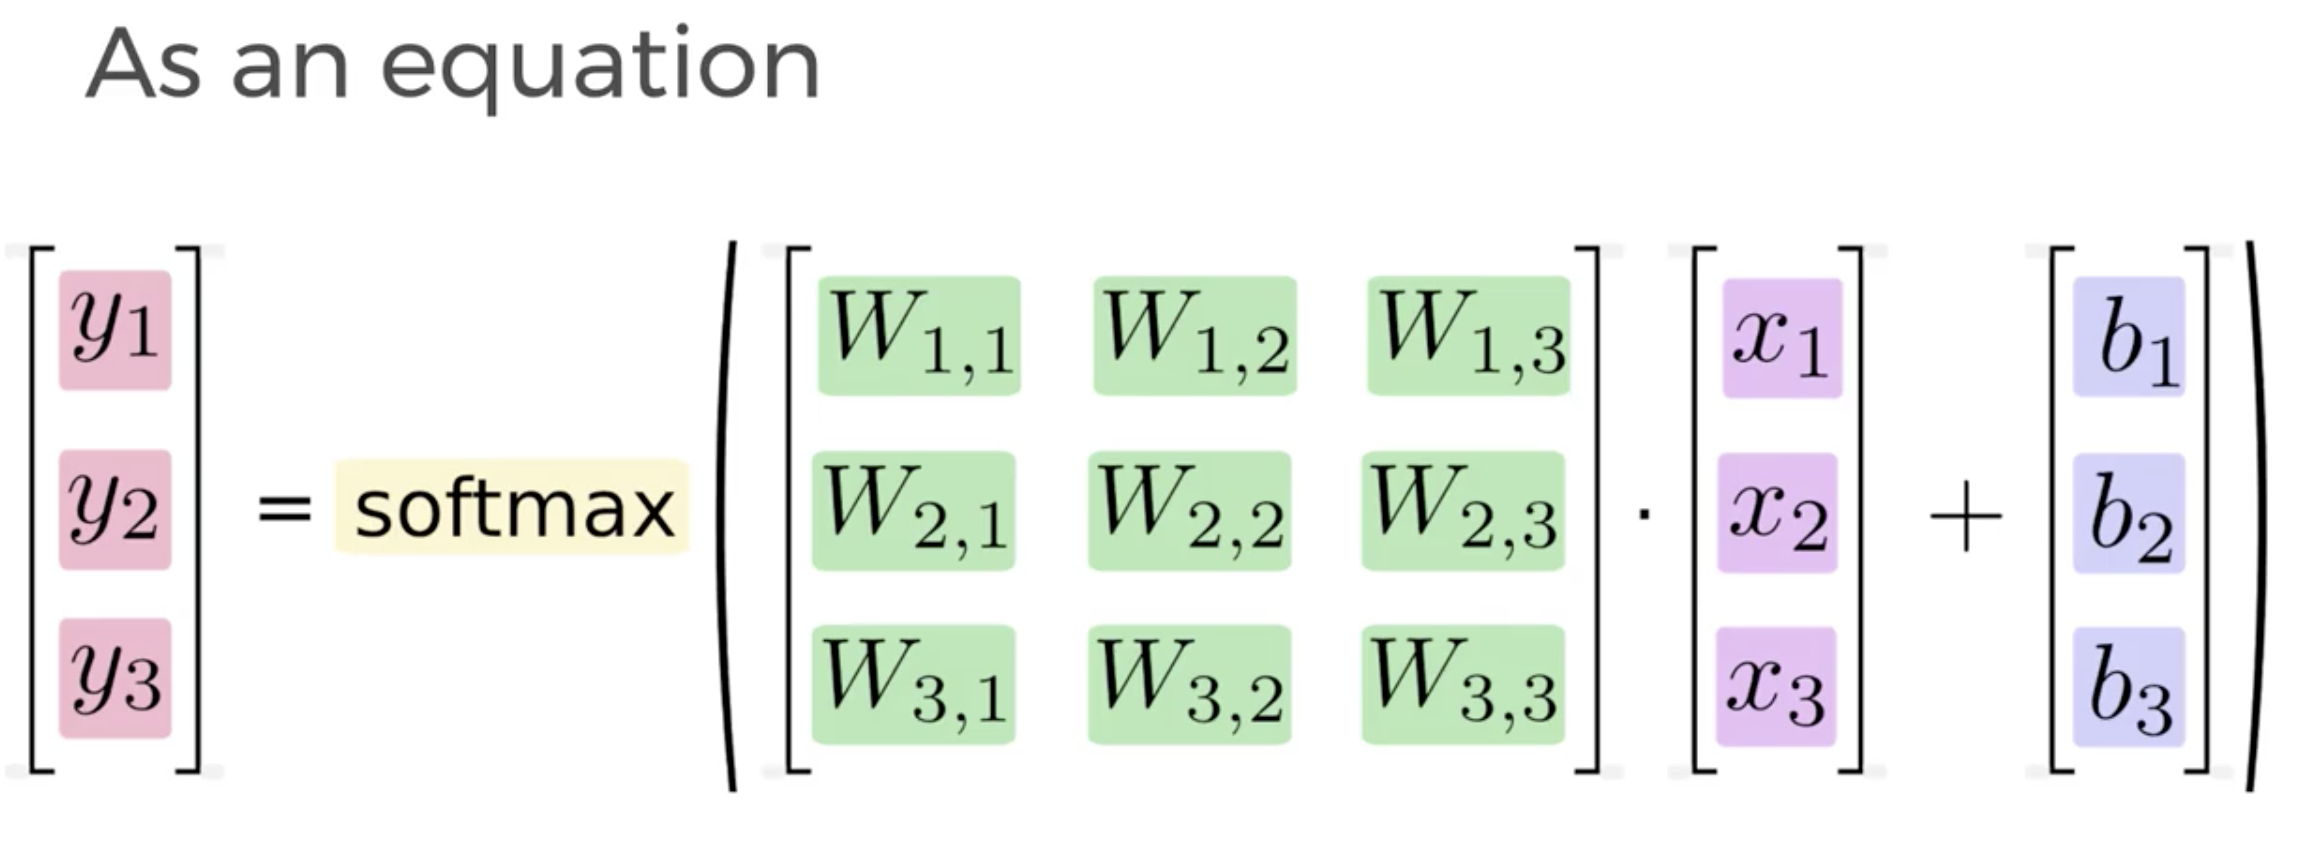

# MNIST

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
mnist.train.images[1].shape
# Convert this to 28x28

(784,)

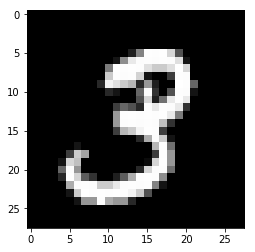

In [14]:
plt.imshow(mnist.train.images[1].reshape(28,28), cmap="gray")
plt.show()

In [26]:
# Placeholders
x = tf.placeholder(tf.float32, shape=[None, 784]) # None is filled by the batch size. 784 is the flattend 28*28
w = tf.Variable(tf.zeros([784,10])) # 784 pixels * 10 possible labels
b = tf.Variable(tf.zeros([10])) # 10 possible labels

In [27]:
y = tf.matmul(x, w) + b

In [28]:
y_true = tf.placeholder(tf.float32, [None,10])


In [29]:
# Labels are the true labels
# y are the predictions
# Cross entropy is how off are you
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [30]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train = optimizer.minimize(cross_entropy)

In [31]:
# Create session
init = tf.global_variables_initializer()



In [33]:
with tf.Session() as sess:
    sess.run(init)
    
    steps=1000
    batch_size=100
    for step in range(steps):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # DO NOT QUOTE the FEED DICT!! 'x' does not work!
        sess.run(train, feed_dict={x: batch_x, y_true: batch_y})
        
    # Evaluate
    correct_prediction = tf.equal(tf.argmax(y,axis=1), tf.argmax(y_true,axis=1))
    #[True, False, True...]
    
    acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    # [1.0, 0.0]
    # acc = 0.5
    print(sess.run(acc, feed_dict={x: mnist.train.images, y_true: mnist.train.labels}))

0.9166


# Accuracy
 91.6%
 but we can do better!